# Visualization using matplotlib and Dataframes

## We use the standard convention for referencing the matplotlib API:



In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Basic plotting: plot
## The plot method on Series and DataFrame is just a simple wrapper around plt.plot():

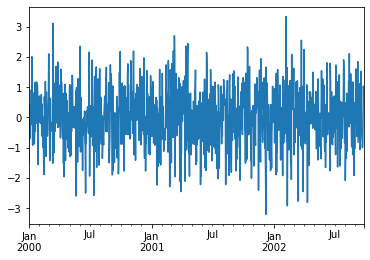

In [8]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts.plot();

<Figure size 432x288 with 0 Axes>

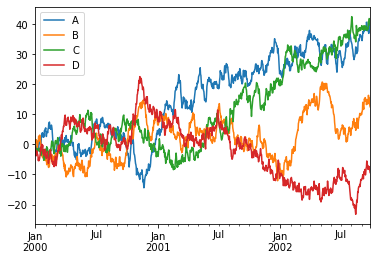

In [13]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum() #stands for cumulative sum

plt.figure();

df.plot();

# pandas.DataFrame.cumsum
## Return cumulative sum over a DataFrame or Series axis.
## Returns a DataFrame or Series of the same size containing the cumulative sum.




### You can plot one column versus another using the x and y keywords in plot():



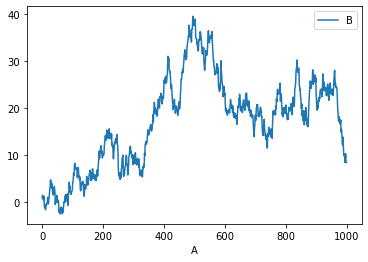

In [14]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

df3["A"] = pd.Series(list(range(len(df))))

df3.plot(x="A", y="B");

# Other plots
## Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:
### ‘bar’ or ‘barh’ for bar plots
### ‘hist’ for histogram
### ‘box’ for boxplot
### ‘kde’ or ‘density’ for density plots
### ‘area’ for area plots
### ‘scatter’ for scatter plots
### ‘hexbin’ for hexagonal bin plots
### ‘pie’ for pie plots
### For example, a bar plot can be created the following way:

<Figure size 432x288 with 0 Axes>

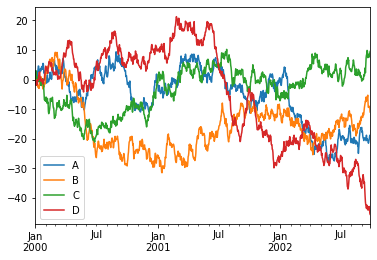

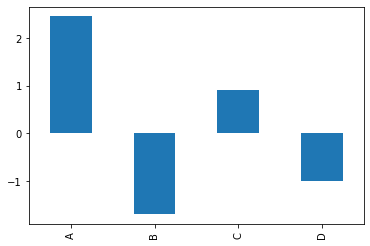

In [20]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
plt.figure();
df.plot();
plt.figure();
df.iloc[5].plot(kind="bar");

# Bar plots
## For labeled, non-time series data, you may wish to produce a bar plot:

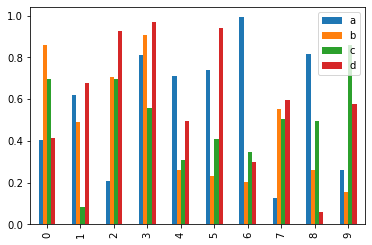

In [21]:
 df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar();

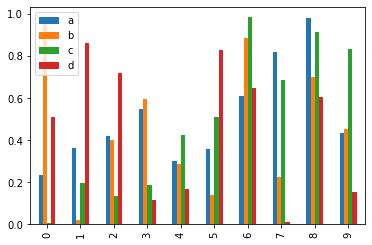

In [22]:
 df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
In [21]: df2.plot.bar();

# Pie plot
## You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. 


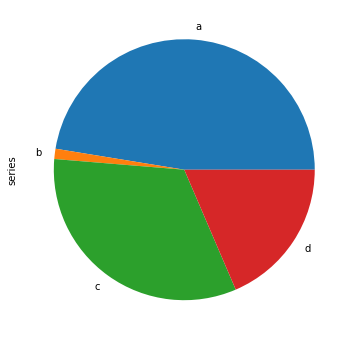

In [23]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6));

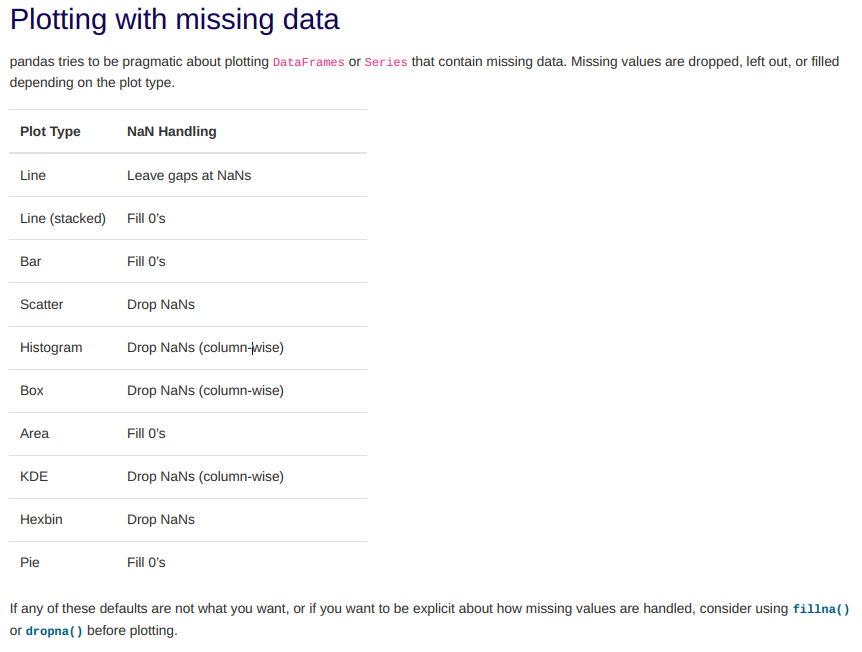

In [27]:
from IPython.display import Image
Image(filename='missingdataplot.png')

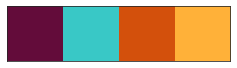

In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [29]:
#number of points per group
n = 50

#define group labels and their centers
groups = {'A': (2,2),
          'B': (3,4),
          'C': (4,4),
          'D': (4,1)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], 
                                                           [0.5,0.5], 
                                                           [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group

data.head()

,x,y,label
0,2.04354,2.12355,A
1,0.88999,1.31942,A
2,1.76618,2.33485,A
3,3.3929,1.59089,A
4,1.81626,1.62353,A


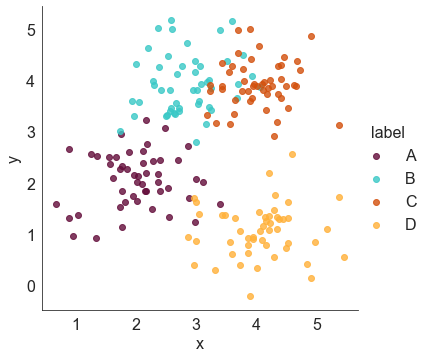

In [30]:
#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

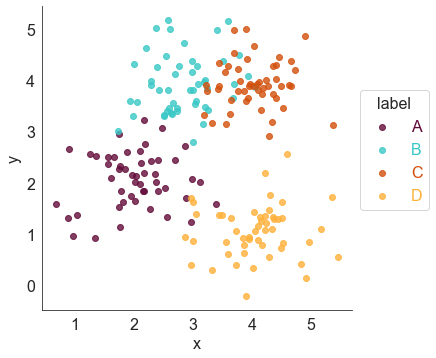

In [31]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])